# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

from xopt.bayesian.algorithms import bayesian_exploration

# test function
from xopt.tests.evaluators import TNK

In [2]:
# To see log messages
from xopt import output_notebook
output_notebook()

In [3]:
# Get VOCS
VOCS = TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = TNK.evaluate_TNK

n_steps = 30
generator_options = {}


if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=n_steps,                       ## number of optimization step
                               generator_options=generator_options,
                               verbose=True)

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x7f93f22342b0>
submitting initial candidates at time 2021-09-27T22:08:32-07:00
starting optimization loop
submitting candidates at time 2021-09-27T22:08:33-07:00
submitting candidates at time 2021-09-27T22:08:34-07:00
submitting candidates at time 2021-09-27T22:08:35-07:00
submitting candidates at time 2021-09-27T22:08:36-07:00
submitting candidates at time 2021-09-27T22:08:37-07:00
submitting candidates at time 2021-09-27T22:08:39-07:00
submitting candidates at time 2021-09-27T22:08:40-07:00
submitting candidates at time 2021-09-27T22:08:42-07:00
submitting candidates at time 2021-09-27T22:08:44-07:00
submitting candidates at time 2021-09-27T22:08:45-07:00
submitting candidates at time 2021-09-27T22:08:47-07:00
submitting candidates at time 2021-09-27T22:08:49-07:00
submitting candidates at time 2021-09-27T22:08:50-07:00
submitting candidates at time 2021-09-27T22

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


Text(0, 0.5, '$x_2$')

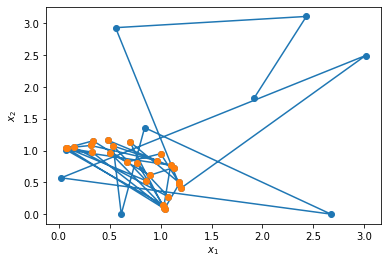

In [4]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [5]:
# Get VOCS
VOCS = TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}
# Get evaluate function
EVALUATE = TNK.evaluate_TNK
n_steps = 30

generator_options = {'sigma': torch.eye(2) * 0.5,            ## Specify proximal term (requires batch_size = 1)
                     #'batch_size': 5,                       ## Specify batched exploration
                     # 'custom_model': myCustomModel,        ## Specify custom model creation function
                     # 'use_gpu': False,                         ## Use GPU (if available)
                    }
if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               generator_options = generator_options,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=n_steps,                       ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               verbose=True)

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x7f93f41231f0>
submitting initial candidates at time 2021-09-27T22:09:27-07:00
starting optimization loop
submitting candidates at time 2021-09-27T22:09:29-07:00
submitting candidates at time 2021-09-27T22:09:30-07:00
submitting candidates at time 2021-09-27T22:09:31-07:00
submitting candidates at time 2021-09-27T22:09:32-07:00
submitting candidates at time 2021-09-27T22:09:34-07:00
submitting candidates at time 2021-09-27T22:09:36-07:00
submitting candidates at time 2021-09-27T22:09:38-07:00
submitting candidates at time 2021-09-27T22:09:40-07:00
submitting candidates at time 2021-09-27T22:09:42-07:00
submitting candidates at time 2021-09-27T22:09:44-07:00
submitting candidates at time 2021-09-27T22:09:46-07:00
submitting candidates at time 2021-09-27T22:09:48-07:00
submitting candidates at time 2021-09-27T22:09:50-07:00
submitting candidates at time 2021-09-27T22

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


Text(0, 0.5, '$x_2$')

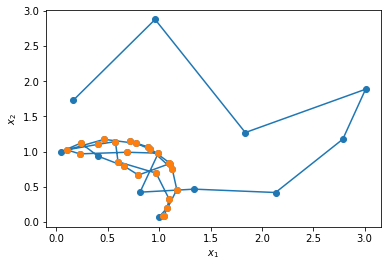

In [6]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')